# import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings

In [3]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [5]:
path = r'\Users\grego\OneDrive\Desktop\Transfer Files\Career Foundry\Specialization\Task 2'

In [7]:
df_pleasant = pd.read_csv(os.path.join(path,'Project ClimateWins - Task 2','Original Data','pleasant_data.csv'))

In [9]:
df_weather = pd.read_csv(os.path.join(path,'Project ClimateWins - Task 2','Original Data','weather_data_original.csv'))

# work (1985 Date)

In [11]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [14]:
weather_nodate = df_pleasant[df_pleasant['DATE'].astype(str).str.contains('198')]
weather_nodate

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
7305,19800101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7306,19800102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7307,19800103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7308,19800104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7309,19800105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19891227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,19891228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,19891229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,19891230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
weather_nodate = weather_nodate.drop(['DATE'], axis=1)

In [20]:
weather_nodate

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
7305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10955,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [24]:
climate_nodate = df_weather[df_weather['DATE'].astype(str).str.contains('198')]
climate_nodate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
7305,19800101,1,6,2.1,0.83,1.0180,0.40,0.01,8,1.6,...,6,0.90,1.0130,0.17,0.05,0,0.0,4.4,2.1,6.0
7306,19800102,1,5,2.1,0.84,1.0180,0.34,0.09,7,0.9,...,7,0.89,1.0195,0.12,1.48,0,0.0,6.4,1.0,11.5
7307,19800103,1,8,2.1,0.80,1.0180,0.44,0.07,9,2.0,...,8,0.95,1.0058,0.13,0.60,0,0.0,9.2,6.2,12.2
7308,19800104,1,8,2.1,0.94,1.0180,0.18,0.43,9,0.0,...,5,0.80,1.0034,0.30,0.50,0,1.5,7.7,5.8,9.2
7309,19800105,1,8,2.1,0.90,1.0180,0.25,0.26,8,0.2,...,7,0.79,1.0134,0.22,0.03,0,0.1,7.6,6.1,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,19891227,12,6,2.1,0.87,1.0157,0.49,0.00,0,4.0,...,6,0.79,1.0105,0.22,0.12,0,0.1,6.0,1.8,10.1
10954,19891228,12,3,2.1,0.84,1.0196,0.54,0.00,0,6.4,...,8,0.84,1.0134,0.18,0.05,0,0.3,9.3,7.5,11.0
10955,19891229,12,4,2.1,0.85,1.0224,0.52,0.00,0,5.5,...,8,0.86,1.0110,0.12,1.10,0,0.0,10.1,8.8,11.4
10956,19891230,12,0,2.1,0.83,1.0233,0.57,0.00,0,6.6,...,8,0.84,1.0138,0.16,0.49,0,0.1,9.9,8.2,10.8


In [25]:
climate_nodate = climate_nodate.drop(['DATE','MONTH',
                                       'GDANSK_cloud_cover',
                                        'GDANSK_humidity',
                                        'GDANSK_precipitation',
                                        'GDANSK_snow_depth',
                                        'GDANSK_temp_mean',
                                        'GDANSK_temp_min',
                                        'GDANSK_temp_max',
                                        'ROMA_cloud_cover',
                                        'ROMA_wind_speed',
                                        'ROMA_humidity','ROMA_pressure',
                                        'ROMA_sunshine',
                                        'ROMA_temp_mean',
                                        'TOURS_wind_speed',
                                        'TOURS_humidity',
                                        'TOURS_pressure',
                                        'TOURS_global_radiation',
                                        'TOURS_precipitation',
                                        'TOURS_temp_mean',
                                        'TOURS_temp_min',
                                        'TOURS_temp_max'], axis=1)

In [28]:
climate_nodate = climate_nodate.loc[:, ~climate_nodate.columns.str.endswith('_snow_depth')]

In [29]:
position1 = climate_nodate.columns.get_loc('KASSEL_wind_speed')-1
climate_nodate.insert(position1,'KASSEL_cloud_cover',climate_nodate['LJUBLJANA_cloud_cover'])

In [32]:
position2 = climate_nodate.columns.get_loc('MUNCHENB_humidity')-1
position3 = climate_nodate.columns.get_loc('MUNCHENB_global_radiation')-1
climate_nodate.insert(position2,'MUNCHENB_wind_speed',climate_nodate['SONNBLICK_wind_speed'])
climate_nodate.insert(position3,'MUNCHENB_pressure',climate_nodate['SONNBLICK_pressure'])

In [34]:
position4 = climate_nodate.columns.get_loc('STOCKHOLM_pressure')-1
climate_nodate.insert(position4,'STOCKHOLM_humidity',climate_nodate['OSLO_humidity'])
position5 = climate_nodate.columns.get_loc('STOCKHOLM_humidity')-1
climate_nodate.insert(position5,'STOCKHOLM_wind_speed',climate_nodate['OSLO_wind_speed'])

In [36]:
climate_nodate = climate_nodate.loc[:, ~climate_nodate.columns.str.endswith('_wind_speed')]

In [38]:
climate_nodate

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
7305,6,0.83,1.0180,0.40,0.01,1.6,-0.8,-4.4,1.2,5,...,1.1,6,0.90,1.0130,0.17,0.05,0.0,4.4,2.1,6.0
7306,5,0.84,1.0180,0.34,0.09,0.9,-1.7,-4.0,0.6,7,...,-1.2,7,0.89,1.0195,0.12,1.48,0.0,6.4,1.0,11.5
7307,8,0.80,1.0180,0.44,0.07,2.0,-0.6,-3.7,1.3,8,...,-5.0,8,0.95,1.0058,0.13,0.60,0.0,9.2,6.2,12.2
7308,8,0.94,1.0180,0.18,0.43,0.0,-0.9,-2.2,2.2,5,...,-5.4,5,0.80,1.0034,0.30,0.50,1.5,7.7,5.8,9.2
7309,8,0.90,1.0180,0.25,0.26,0.2,3.0,0.5,5.3,3,...,0.2,7,0.79,1.0134,0.22,0.03,0.1,7.6,6.1,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10953,6,0.87,1.0157,0.49,0.00,4.0,-0.9,-2.4,1.8,7,...,4.0,6,0.79,1.0105,0.22,0.12,0.1,6.0,1.8,10.1
10954,3,0.84,1.0196,0.54,0.00,6.4,-1.1,-2.8,1.8,7,...,2.2,8,0.84,1.0134,0.18,0.05,0.3,9.3,7.5,11.0
10955,4,0.85,1.0224,0.52,0.00,5.5,-1.7,-4.5,1.3,8,...,0.4,8,0.86,1.0110,0.12,1.10,0.0,10.1,8.8,11.4
10956,0,0.83,1.0233,0.57,0.00,6.6,-2.1,-4.3,1.6,8,...,-0.5,8,0.84,1.0138,0.16,0.49,0.1,9.9,8.2,10.8


In [40]:
X = climate_nodate
y = weather_nodate

In [42]:
X.shape

(3653, 135)

In [44]:
y.shape

(3653, 15)

In [46]:
y.shape

(3653, 15)

In [48]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [71]:
X = X.to_numpy()  # or X = X.values
X = X.reshape(-1, 15, 9)
print(X.shape)

(3653, 15, 9)


In [73]:
X = X.reshape(-1, 15, 9)
print(X.shape)


(3653, 15, 9)


In [92]:
y = np.array(y)
y.shape

(3653,)

y = np.argmax(y, axis=1)
print("y shape after argmax:", y.shape)

In [95]:
print("Unique values in y:", np.unique(y))

Unique values in y: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14]


In [97]:
y.shape

(3653,)

# create train and test

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [101]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2922, 15, 9) (2922,)
(731, 15, 9) (731,)


In [103]:
def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs, layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'SGD']
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU, 'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]
    optimizer_name = optimizerL[round(optimizer)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)

    def cnn_model():
        model = Sequential()
        model.add(Input(shape=(timesteps, input_dim)))
        model.add(Conv1D(neurons, kernel_size=kernel, activation=activation))
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=127))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax'))  # sigmoid softmax
        
        # Create a new optimizer instance for each iteration
        if optimizer_name == 'Adam':
            optimizer_instance = Adam(learning_rate=learning_rate)
        elif optimizer_name == 'SGD':
            optimizer_instance = SGD(learning_rate=learning_rate)
        elif optimizer_name == 'RMSprop':
            optimizer_instance = RMSprop(learning_rate=learning_rate)
        elif optimizer_name == 'Adadelta':
            optimizer_instance = Adadelta(learning_rate=learning_rate)
        elif optimizer_name == 'Adagrad':
            optimizer_instance = Adagrad(learning_rate=learning_rate)
        elif optimizer_name == 'Adamax':
            optimizer_instance = Adamax(learning_rate=learning_rate)
        elif optimizer_name == 'Nadam':
            optimizer_instance = Nadam(learning_rate=learning_rate)
        elif optimizer_name == 'Ftrl':
            optimizer_instance = Ftrl(learning_rate=learning_rate)
        
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])
        return model

    # K-fold cross-validation
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=20)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=127)
    results = []
    for train, test in kfold.split(X, y):
        model = cnn_model()
        model.fit(X[train], y[train], epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[es])
        scores = model.evaluate(X[test], y[test], verbose=1)
        results.append(scores[1])  # Assuming accuracy is the second metric
    return np.mean(results)


In [105]:
timesteps = X_train.shape[1]

input_dim = X_train.shape[2]

n_classes = 15  

score_acc = make_scorer(accuracy_score)

In [107]:
# Bayesian Optimization
start = time.time()

params = {
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation': (0, 9),  # 9
    'optimizer': (0, 7),  # 7
    'learning_rate': (0.001, 1),
    'batch_size': (200, 1000), #(10, 50), #
    'epochs': (20, 100),
    'layers1': (1, 3),
    'layers2': (1, 3),
    'normalization': (0, 1),
    'dropout': (0, 1),
    'dropout_rate': (0.3, 0.5)
}

nn_opt = BayesianOptimization(bay_area, params, random_state=127)
nn_opt.maximize(init_points=15, n_iter=4)  # 25
print('Search took %s minutes' % ((time.time() - start)/60))


|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 25: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: 73.5635 
Epoch 28: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 97.1184  
Epoch 23: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0923 - loss: 36.9884      
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 54.2871 
Epoch 26: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 41.8492 
| 1         | 0.5174    | 4.714     | 232.0     | 0.186     | 0.4546    | 64.17     | 1.173     | 1.883     | 2.431     | 0.6709    | 52.56     | 0.9062    | 0.7344    |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 22: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: nan 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: nan 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6311 - loss: nan 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: nan 
Epoch 22: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: nan 
| 2         | 0.6252    | 1.573     | 271.1     | 0.6497    | 0.3143    | 56.8      | 2.813     | 1.188     | 2.266     | 0.2669    | 92.48     | 0.1275    | 0.4802    |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 36: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: 1.7169
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6332 - loss: 29.1644 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1806 - loss: 7.4309
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 65.4797 
Epoch 23: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 32.5372 
| 3         | 0.5402    | 6.052     | 361.9     | 0.4819    | 0.3475    | 83.42     | 1.691     | 2.908     | 2.201     | 0.3927    | 67.47     | 0.8815    | 1.416     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: 5.5117
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6302 - loss: 99.1772  
Epoch 36: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - loss: 1.9037  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 2.4177
Epoch 25: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6161 - loss: 2.5585  
| 4         | 0.625     | 5.379     | 539.7     | 0.201     | 0.3324    | 58.97     | 1.07      | 1.821     | 2.718     | 0.3971    | 31.79     | 0.9366    | 5.283     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 27: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1827 - loss: 2.1477
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6302 - loss: 25487.1074
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 1.4572
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 1.5025
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 1.4121
| 5         | 0.5402    | 8.951     | 292.0     | 0.1595    | 0.4401    | 61.92     | 1.349     | 1.874     | 2.395     | 0.5142    | 74.0      | 0.2923    | 2.465     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6197 - loss: 1.2078  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2053 - loss: 2.0884  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4720 - loss: 1.2898 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 1.1683
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4849 - loss: 3.1342
| 6         | 0.4832    | 2.783     | 778.9     | 0.1646    | 0.3458    | 31.58     | 1.392     | 2.01      | 1.545     | 0.2438    | 41.07     | 0.9895    | 4.893     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7268 - loss: 0.8096  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4535 - loss: 1.7423
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4806 - loss: 1.6210  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - loss: 1.0034  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 1.0652  
| 7         | 0.5916    | 4.522     | 744.1     | 0.9174    | 0.4632    | 96.58     | 2.627     | 1.598     | 1.644     | 0.677     | 14.0      | 0.7135    | 3.301     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 31: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5857 - loss: 17452.0176
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4360 - loss: 2697509.5000
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 152.1608
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5083 - loss: 698111.9375 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2351 - loss: 321950.0312
| 8         | 0.4738    | 5.759     | 605.0     | 0.1657    | 0.3829    | 90.37     | 2.722     | 1.829     | 2.336     | 0.757     | 82.59     | 0.674     | 2.146     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 22: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6115 - loss: 1.2882
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 1.2284
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6311 - loss: nan 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: nan 
Epoch 23: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 1.2654
| 9         | 0.6252    | 1.71      | 383.0     | 0.1859    | 0.3541    | 79.76     | 1.194     | 1.526     | 2.075     | 0.9041    | 84.38     | 0.8003    | 0.09905   |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 58: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6115 - loss: 1.3620  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6297 - loss: 2.5597  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5852 - loss: 27.8856 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 1.2190  
Epoch 31: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6161 - loss: 1.4637  
| 10        | 0.6143    | 8.678     | 869.4     | 0.6053    | 0.3531    | 71.57     | 2.462     | 1.09      | 2.968     | 0.9803    | 46.71     | 0.6235    | 2.347     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 23: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6115 - loss: 1.3008
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6332 - loss: 1.2231  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - loss: 1.2854  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 1.1733  
Epoch 22: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6161 - loss: 1.3161  
| 11        | 0.6252    | 1.267     | 961.5     | 0.8919    | 0.4301    | 81.52     | 2.994     | 2.373     | 1.792     | 0.05079   | 45.2      | 0.7669    | 6.906     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 85: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4468 - loss: 9488001024.0000  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6544 - loss: 11403455488.0000
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4695 - loss: 355585696.0000  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5844 - loss: 68575888.0000  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - loss: 24705654.0000  
| 12        | 0.562     | 7.83      | 284.2     | 0.2654    | 0.4736    | 97.1      | 1.922     | 1.464     | 2.467     | 0.9535    | 44.37     | 0.1684    | 1.164     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 75: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6115 - loss: 1.2832  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0759 - loss: 45.5174  
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 6.7011 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 23.0816  
Epoch 31: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6161 - loss: 50.8808  
| 13        | 0.5174    | 5.513     | 996.0     | 0.9747    | 0.3528    | 96.45     | 1.56      | 1.62      | 2.64      | 0.9727    | 19.0      | 0.7042    | 5.893     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 23: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: 1.2830
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 1.2757
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 1.1656
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 1.1989
Epoch 22: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 1.2523
| 14        | 0.6252    | 2.229     | 222.4     | 0.215     | 0.4863    | 95.6      | 2.074     | 1.007     | 2.594     | 0.2169    | 85.73     | 0.3766    | 1.242     |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.8228
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7350 - loss: 0.8599
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7061 - loss: 0.8729
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6715 - loss: 0.8894
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7286 - loss: 0.8097
| 15        | 0.7227    | 3.8       | 283.3     | 0.7075    | 0.4555    | 34.66     | 1.933     | 2.556     | 2.461     | 0.05664   | 78.55     | 0.4846    | 0.4789    |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 22: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: 1.3280
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 1.2216
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6311 - loss: 1.2483 
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 1.1646
Epoch 22: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 1.2562
| 16        | 0.6252    | 2.015     | 961.9     | 0.7272    | 0.3837    | 82.11     | 2.41      | 2.047     | 1.579     | 0.1401    | 46.12     | 0.8114    | 6.81      |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Epoch 23: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6115 - loss: 1.3365
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 1.2627
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6311 - loss: 1.2750
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 1.2262
Epoch 21: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6161 - loss: 1.3296
| 17        | 0.6252    | 0.7395    | 275.8     | 0.9433    | 0.411     | 30.3      | 2.587     | 2.346     | 2.431     | 0.001     | 86.25     | 0.4554    | 0.0       |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6319 - loss: 1.0378
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5946 - loss: 1.1911
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6055 - loss: 1.1265
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 1.0003
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6145 - loss: 1.0906
| 18        | 0.6228    | 5.059     | 287.5     | 0.6588    | 0.4984    | 29.85     | 1.418     | 2.988     | 2.484     | 0.001     | 72.2      | 0.5556    | 0.07981   |


C:\Users\grego\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6445 - loss: 1.0116
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 0.9916
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 1.0342
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.9768
Epoch 20: early stopping
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5792 - loss: 1.0924
| 19        | 0.6447    | 3.87      | 281.5     | 0.6331    | 0.4368    | 41.34     | 2.035     | 2.277     | 2.441     | 0.005433  | 80.29     | 0.414     | 0.4661    |
Search took 12.143835914134979 minutes


In [112]:
best_params = nn_opt.max['params']
best_score = nn_opt.max['target']

print(f"Best Parameters: {best_params}")
print(f"Highest Accuracy: {best_score}")

Best Parameters: {'activation': 3.8000000664394693, 'batch_size': 283.3322390154355, 'dropout': 0.7074595585192304, 'dropout_rate': 0.4555434720662375, 'epochs': 34.65960061877632, 'kernel': 1.9330370404101562, 'layers1': 2.5563423061372124, 'layers2': 2.4609201417995576, 'learning_rate': 0.05663626674115159, 'neurons': 78.55253178394501, 'normalization': 0.48455285581376706, 'optimizer': 0.4788637472286189}
Highest Accuracy: 0.7226895093917847


In [114]:
# Retrieve the best parameters from the optimization result
optimum = nn_opt.max['params']

learning_rate = optimum['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', 'LeakyReLU', 'relu']
activation = activationL[round(optimum['activation'])]

optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])
optimum['kernel'] = round(optimum['kernel'])

optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD = {
    'SGD': SGD(learning_rate=learning_rate),
    'Adam': Adam(learning_rate=learning_rate),
    'RMSprop': RMSprop(learning_rate=learning_rate),
    'Adadelta': Adadelta(learning_rate=learning_rate),
    'Adagrad': Adagrad(learning_rate=learning_rate),
    'Adamax': Adamax(learning_rate=learning_rate),
    'Nadam': Nadam(learning_rate=learning_rate),
    'Ftrl': Ftrl(learning_rate=learning_rate)
}

# Retrieve the optimizer name
optimizer_name = optimizerL[round(optimum['optimizer'])]

print(f"Best Parameters: ")
print(f"Activation: {activation}")
print(f"Batch Size: {optimum['batch_size']}")
print(f"Dropout Rate: {optimum['dropout_rate']:.4f}")
print(f"Epochs: {optimum['epochs']}")
print(f"Kernel Size: {optimum['kernel']}")
print(f"Layers1: {optimum['layers1']}")
print(f"Layers2: {optimum['layers2']}")
print(f"Learning Rate: {optimum['learning_rate']:.4f}")
print(f"Neurons: {optimum['neurons']}")
print(f"Normalization: {optimum['normalization']:.4f}")
print(f"Optimizer: {optimizer_name}")

Best Parameters: 
Activation: tanh
Batch Size: 283
Dropout Rate: 0.4555
Epochs: 35
Kernel Size: 2
Layers1: 3
Layers2: 2
Learning Rate: 0.0566
Neurons: 79
Normalization: 0.4846
Optimizer: SGD


# CNN Model

In [117]:
# Best parameters from optimization
best_params = {
    'neurons': 13,
    'kernel': 3,
    'activation': 'softsign',
    'optimizer': 'Adam',
    'learning_rate': 0.0615,
    'batch_size': 858,
    'epochs':60,
    'layers1': 2,
    'layers2': 2,
    'normalization': 0.4579,
    'dropout': 0.40228837505867143,
    'dropout_rate':  0.3935
}

# Initialize optimizer with learning rate
optimizers = {
    'Adam': Adam(learning_rate=best_params['learning_rate']),
    'SGD': SGD(learning_rate=best_params['learning_rate']),
    'RMSprop': RMSprop(learning_rate=best_params['learning_rate']),
    'Adadelta': Adadelta(learning_rate=best_params['learning_rate']),
    'Adagrad': Adagrad(learning_rate=best_params['learning_rate']),
    'Adamax': Adamax(learning_rate=best_params['learning_rate']),
    'Nadam': Nadam(learning_rate=best_params['learning_rate']),
    'Ftrl': Ftrl(learning_rate=best_params['learning_rate'])
}

optimizer = optimizers[best_params['optimizer']]

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
#n_classes = len(y_train[0])

model = Sequential()
model.add(Conv1D(best_params['neurons'], kernel_size=best_params['kernel'], activation=best_params['activation'], input_shape=(15,9)))

if best_params['normalization'] > 0.5:
    model.add(BatchNormalization())

for _ in range(best_params['layers1']):
    model.add(Dense(best_params['neurons'], activation=best_params['activation']))

if best_params['dropout'] > 0.5:
    model.add(Dropout(best_params['dropout_rate'], seed=123))

for _ in range(best_params['layers2']):
    model.add(Dense(best_params['neurons'], activation=best_params['activation']))

model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) # sigmoid, tanh, softmax

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with the optimized parameters
model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=2)


Epoch 1/60


C:\Users\grego\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 - 3s - 746ms/step - accuracy: 0.4432 - loss: 2.0256
Epoch 2/60
4/4 - 0s - 14ms/step - accuracy: 0.5226 - loss: 1.3219
Epoch 3/60
4/4 - 0s - 14ms/step - accuracy: 0.6150 - loss: 1.2178
Epoch 4/60
4/4 - 0s - 13ms/step - accuracy: 0.6239 - loss: 1.1379
Epoch 5/60
4/4 - 0s - 14ms/step - accuracy: 0.5910 - loss: 1.1584
Epoch 6/60
4/4 - 0s - 14ms/step - accuracy: 0.5955 - loss: 1.0827
Epoch 7/60
4/4 - 0s - 14ms/step - accuracy: 0.6205 - loss: 1.0695
Epoch 8/60
4/4 - 0s - 14ms/step - accuracy: 0.6126 - loss: 1.0440
Epoch 9/60
4/4 - 0s - 14ms/step - accuracy: 0.6184 - loss: 1.0149
Epoch 10/60
4/4 - 0s - 13ms/step - accuracy: 0.6222 - loss: 1.0003
Epoch 11/60
4/4 - 0s - 15ms/step - accuracy: 0.6102 - loss: 0.9993
Epoch 12/60
4/4 - 0s - 29ms/step - accuracy: 0.6431 - loss: 0.9637
Epoch 13/60
4/4 - 0s - 16ms/step - accuracy: 0.6561 - loss: 0.9367
Epoch 14/60
4/4 - 0s - 14ms/step - accuracy: 0.6554 - loss: 0.9484
Epoch 15/60
4/4 - 0s - 14ms/step - accuracy: 0.6762 - loss: 0.9070
Epoch 16/60
4/

In [124]:
model.summary()

Model: "sequential_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_95 (Conv1D)              │ (None, 13, 13)         │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_490 (Dense)               │ (None, 13, 13)         │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_491 (Dense)               │ (None, 13, 13)         │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_492 (Dense)               │ (None, 13, 13)         │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_493 (Dense)               │ (None, 13, 13)         │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_95 (MaxPooling1D) │ (None, 6, 13)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_95 (Flatten)            │ (None, 78)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_494 (Dense)               │ (None, 15)             │         1,185 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,833 (26.70 KB)

 Trainable params: 2,277 (8.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,556 (17.80 KB)

In [128]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
y_train_one_hot = to_categorical(y_train, num_classes=15)

In [134]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train_one_hot shape: {y_train_one_hot.shape}')

X_train shape: (2922, 15, 9)
y_train_one_hot shape: (2922, 15)


In [137]:
model.fit(X_train, y_train_one_hot, batch_size=744, epochs=97, verbose=2)

Epoch 1/97
4/4 - 4s - 1s/step - accuracy: 0.7132 - loss: 0.7600
Epoch 2/97
4/4 - 0s - 22ms/step - accuracy: 0.7426 - loss: 0.7143
Epoch 3/97
4/4 - 0s - 20ms/step - accuracy: 0.7454 - loss: 0.7025
Epoch 4/97
4/4 - 0s - 19ms/step - accuracy: 0.7536 - loss: 0.6903
Epoch 5/97
4/4 - 0s - 18ms/step - accuracy: 0.7580 - loss: 0.6795
Epoch 6/97
4/4 - 0s - 21ms/step - accuracy: 0.7560 - loss: 0.6752
Epoch 7/97
4/4 - 0s - 20ms/step - accuracy: 0.7584 - loss: 0.6704
Epoch 8/97
4/4 - 0s - 19ms/step - accuracy: 0.7632 - loss: 0.6636
Epoch 9/97
4/4 - 0s - 22ms/step - accuracy: 0.7649 - loss: 0.6585
Epoch 10/97
4/4 - 0s - 19ms/step - accuracy: 0.7683 - loss: 0.6548
Epoch 11/97
4/4 - 0s - 20ms/step - accuracy: 0.7700 - loss: 0.6497
Epoch 12/97
4/4 - 0s - 20ms/step - accuracy: 0.7710 - loss: 0.6451
Epoch 13/97
4/4 - 0s - 21ms/step - accuracy: 0.7714 - loss: 0.6410
Epoch 14/97
4/4 - 0s - 21ms/step - accuracy: 0.7710 - loss: 0.6373
Epoch 15/97
4/4 - 0s - 19ms/step - accuracy: 0.7724 - loss: 0.6342
Epoch 

In [142]:
# Change this to Weather true/false
stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'}

In [145]:
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_test: [ 0  1  2  3  4  5  7  9 10 11 14]


In [148]:
def confusion_matrix(y_true, y_pred, stations):
    # Check if y_true and y_pred are one-hot encoded or already class indices
    if y_true.ndim == 1:
        y_true_labels = y_true
    else:
        y_true_labels = np.argmax(y_true, axis=1)
    
    if y_pred.ndim == 1:
        y_pred_labels = y_pred
    else:
        y_pred_labels = np.argmax(y_pred, axis=1)
        
    # Map numeric labels to activity names
    y_true_series = pd.Series([stations[y] for y in y_true_labels])
    y_pred_series = pd.Series([stations[y] for y in y_pred_labels])
    
    return pd.crosstab(y_true_series, y_pred_series, rownames=['True'], colnames=['Pred'])



In [151]:
y_test_one_hot = to_categorical(y_test, num_classes=15)

In [154]:
y_pred = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [163]:
y_pred_labels = np.argmax(y_pred, axis=1)

In [165]:
y_test_labels = np.argmax(y_test_one_hot, axis=1)

In [167]:
correct_predictions = np.sum(y_test_labels == y_pred_labels)
total_samples = len(y_test_labels)
accuracy = correct_predictions / total_samples

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 74.97%


In [169]:
cm = confusion_matrix(y_test, y_pred, stations)
print(cm)

Pred        BASEL  BELGRADE  BUDAPEST  DEBILT  HEATHROW  LJUBLJANA  MADRID
True                                                                      
BASEL         412        33         1       0         1          1      13
BELGRADE       41       100         0       0         1          1      11
BUDAPEST        8        13         3       1         0          1       5
DEBILT          3         3         0       1         1          0       0
DUSSELDORF      1         0         0       0         0          0       1
HEATHROW        1         1         0       0         0          0       4
LJUBLJANA       1         1         0       0         0          0       2
MADRID         17         8         0       0         3          0      32
MUNCHENB        0         1         0       0         0          0       0
OSLO            1         1         0       0         0          0       0
VALENTIA        2         0         0       0         0          0       0


In [58]:
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
clf.fit(X_train, y_train)



RandomForestClassifier()

In [59]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9726027397260274


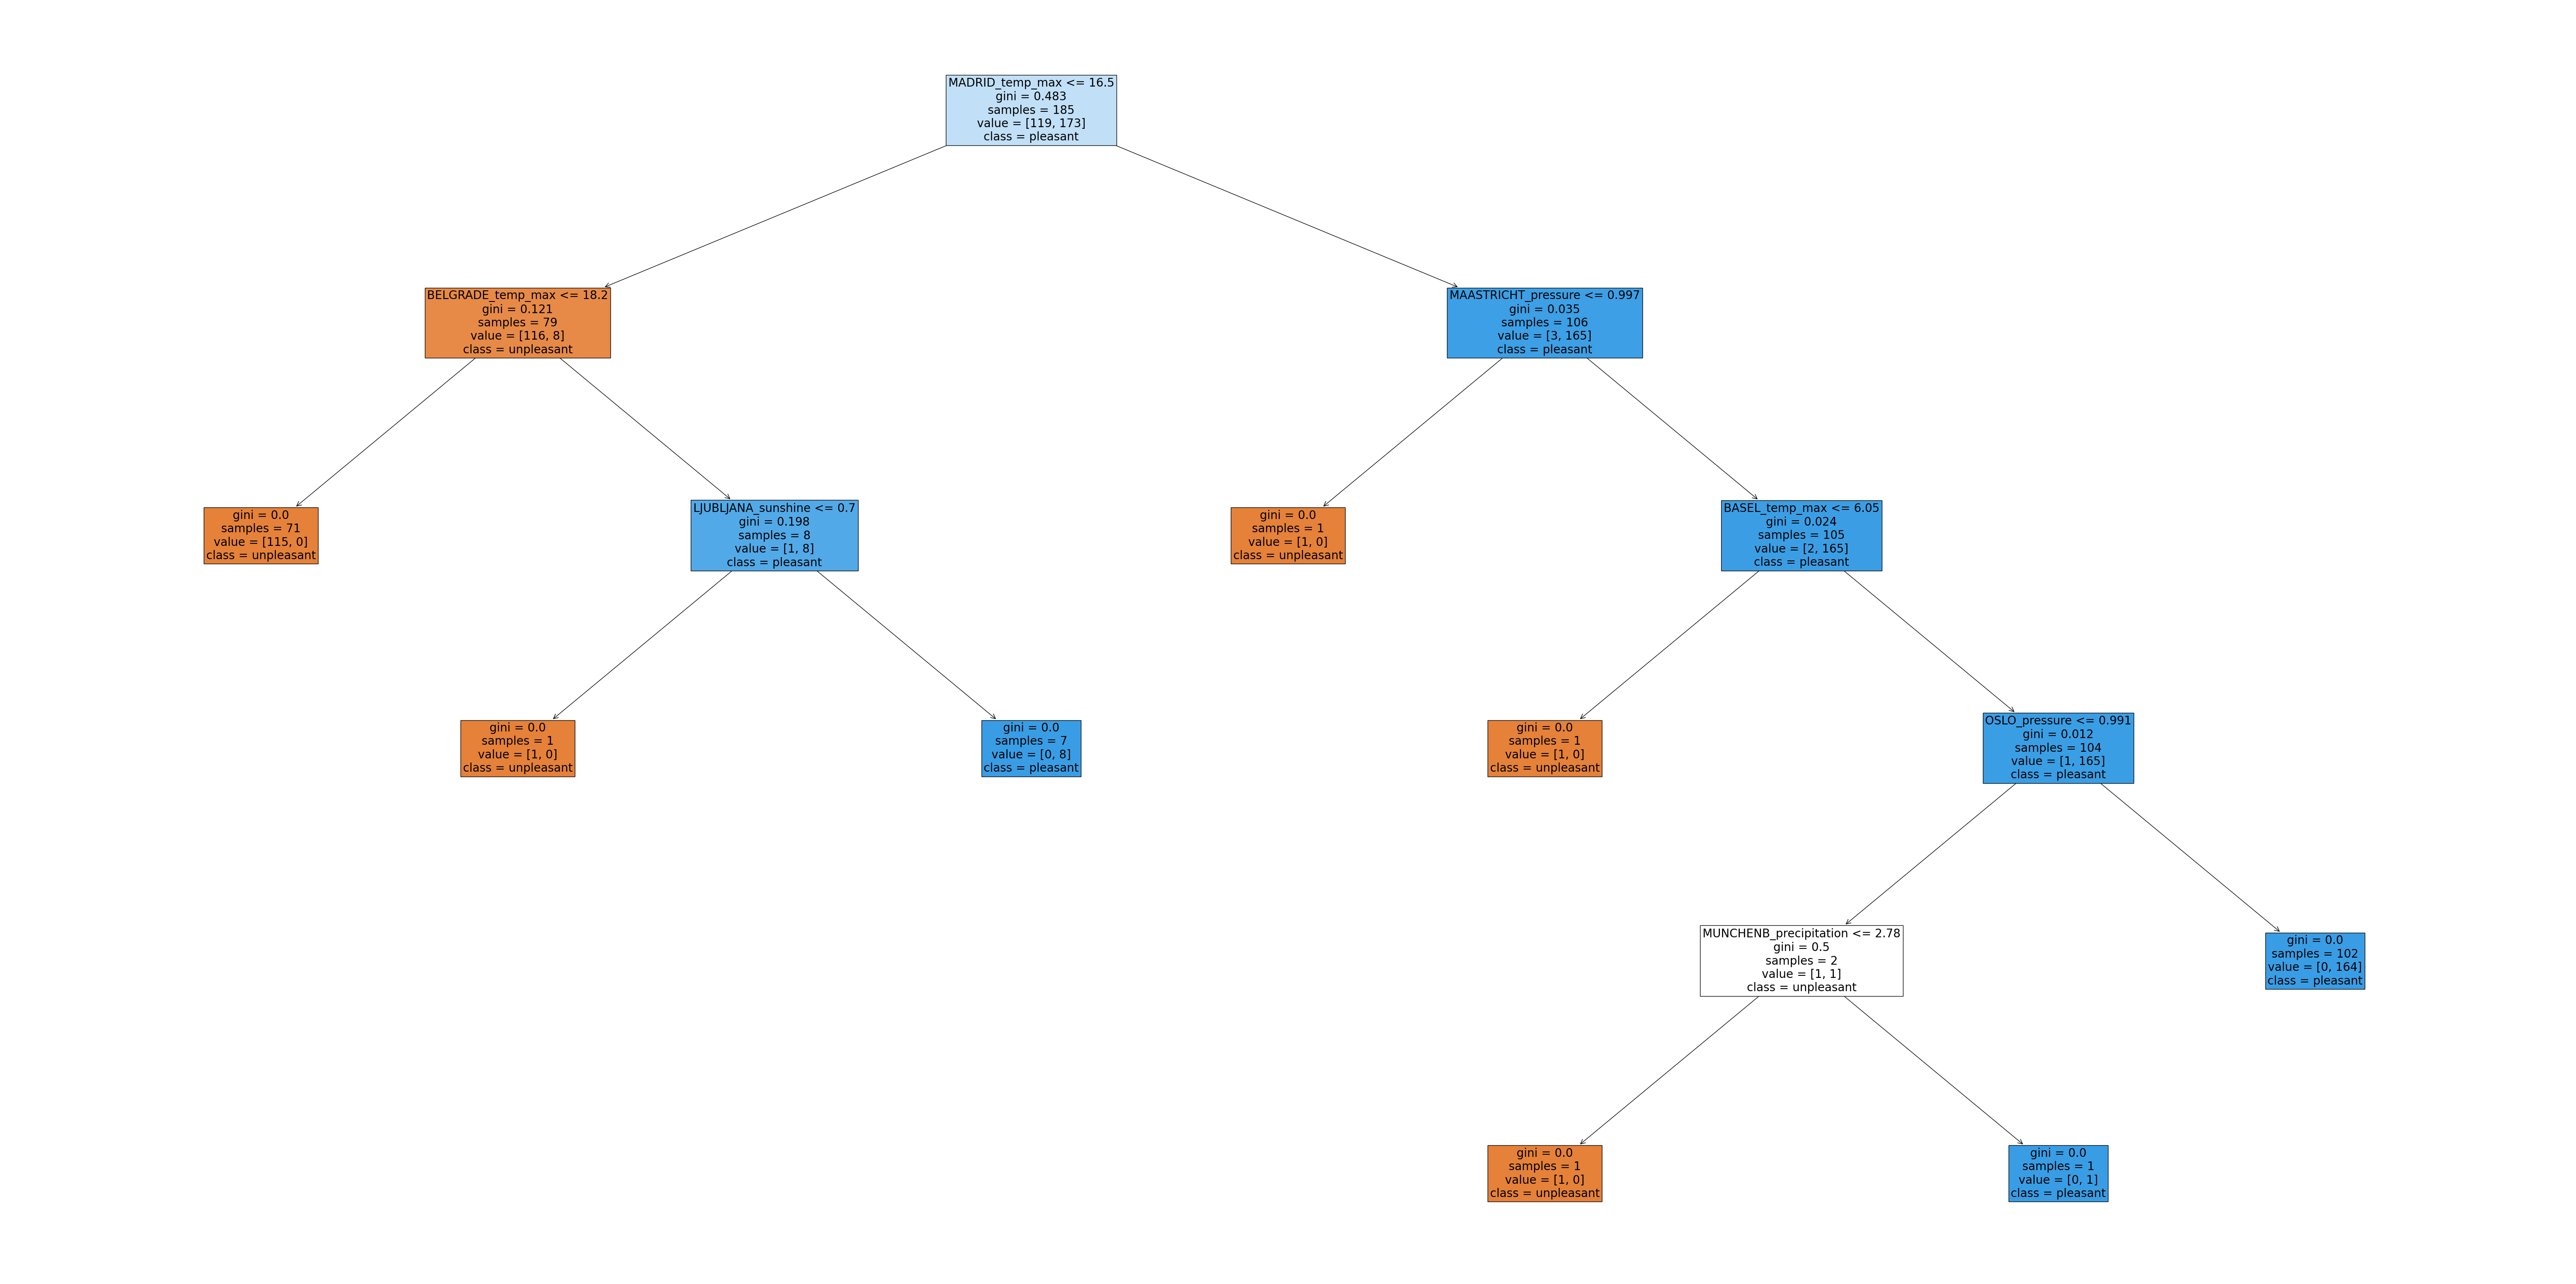

In [62]:
fig_1 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, feature_names=climate_nodate.columns,class_names=['unpleasant', 'pleasant'], filled=True); 

In [76]:
fig_1.savefig(os.path.join(path, 'Project ClimateWins - Task 2','Visualizations','random_forest_1.png'))

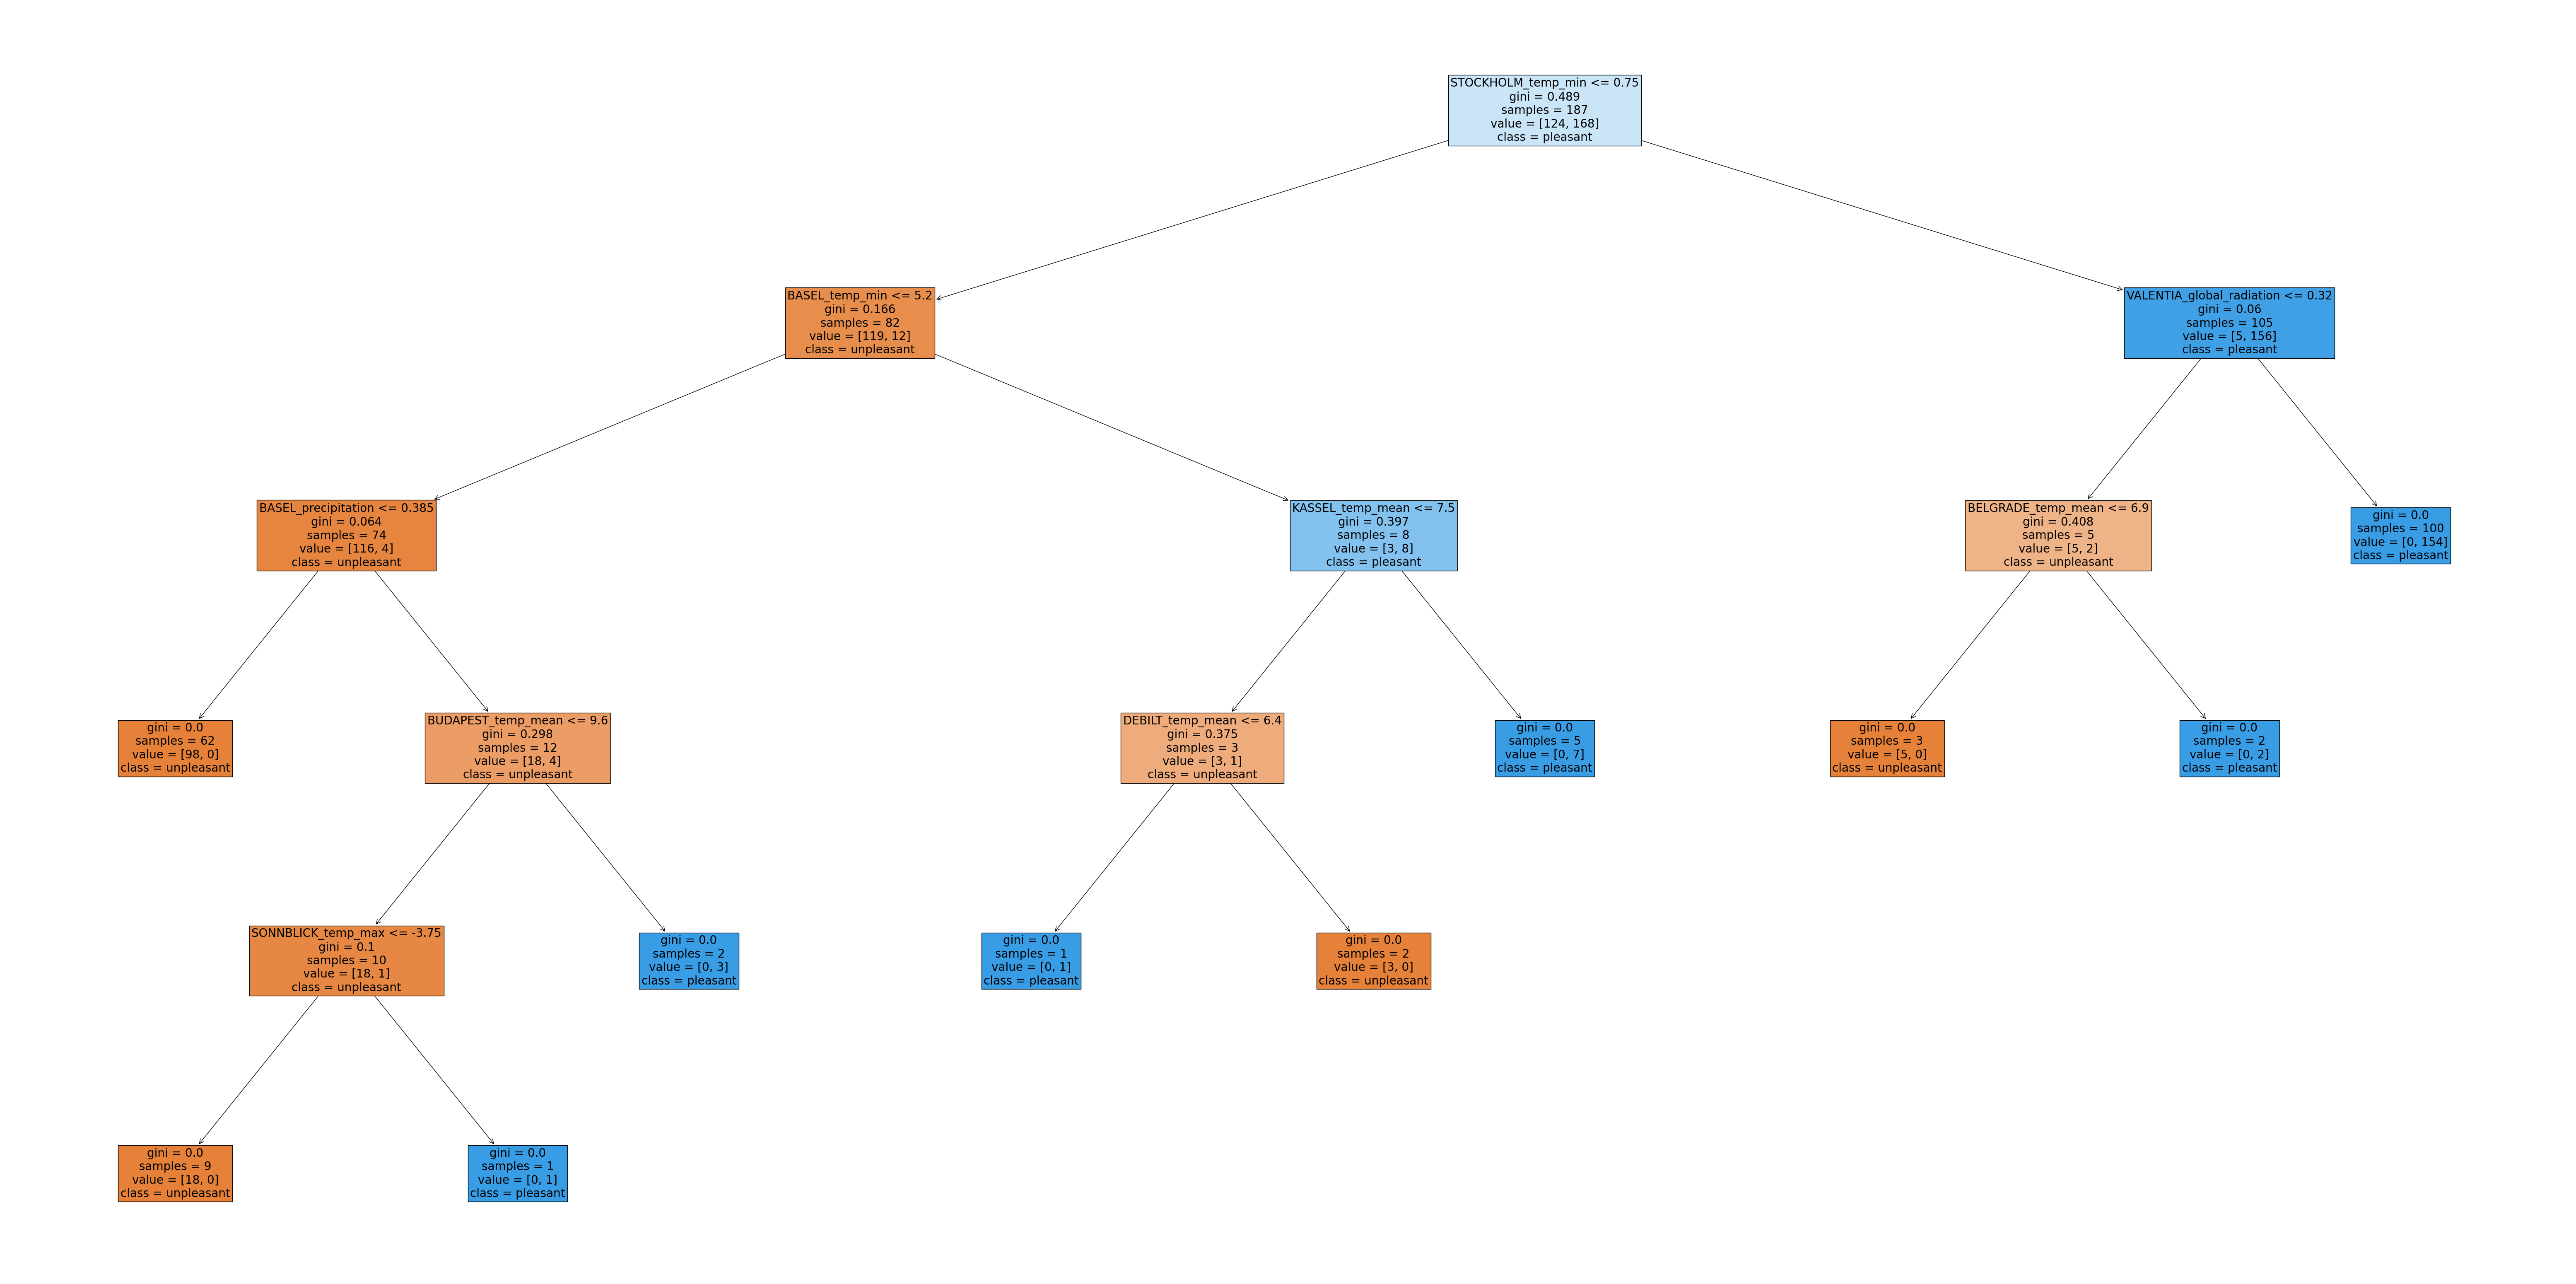

In [80]:
fig_2 = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20,feature_names=climate_nodate.columns,class_names=['unpleasant', 'pleasant'], filled=True);

In [82]:
fig_2.savefig(os.path.join(path, 'Project ClimateWins - Task 2','Visualizations','random_forest_2.png'))

In [84]:
feature_importances_1 = clf.feature_importances_
print("Feature Importances:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances: [0.00000000e+00 1.06600782e-03 7.11085135e-05 5.62648852e-04
 3.23083663e-04 4.31635540e-04 2.79512745e-03 2.23083859e-03
 1.61809395e-02 0.00000000e+00 7.82944247e-04 2.40809847e-04
 3.41026448e-03 0.00000000e+00 2.60523732e-03 2.37776504e-02
 2.57472789e-02 1.01738266e-02 1.88630491e-04 5.39850225e-04
 6.18149707e-04 7.42196633e-04 0.00000000e+00 4.57307178e-04
 4.08274040e-02 6.23587448e-02 3.94114995e-02 5.36655474e-04
 0.00000000e+00 1.02165848e-03 2.34490473e-03 2.92546104e-04
 2.39373508e-04 8.61635167e-03 3.04614599e-04 2.22930524e-02
 5.61545638e-04 4.08003728e-04 0.00000000e+00 3.38624710e-03
 4.24595510e-04 0.00000000e+00 1.57539560e-02 7.29393853e-03
 3.31500244e-02 1.02860364e-04 7.05620801e-05 1.55282347e-04
 3.66497645e-03 4.10004905e-04 6.94421833e-04 3.03771372e-03
 2.33324486e-03 0.00000000e+00 9.60684370e-03 4.43615096e-04
 7.95042276e-05 7.59586328e-04 3.98395227e-04 4.99081544e-04
 3.57083170e-03 1.07619707e-03 2.80571120e-02 0.00000000e+00
 8.

In [86]:
reshaped_importances_1 = feature_importances_1.reshape(-1, 15, 9)

print("Reshaped Importances Shape:", reshaped_importances_1.shape)

Reshaped Importances Shape: (1, 15, 9)


In [88]:
collapsed_importances_1 = np.sum(reshaped_importances_1[0], axis=1)

print("Collapsed Importances Shape:", collapsed_importances_1.shape)
print("Collapsed Importances:", collapsed_importances_1)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.02366139 0.06673801 0.14514378 0.03564916 0.06097831 0.01046907
 0.04449117 0.07520795 0.03471556 0.18892284 0.06283047 0.09264407
 0.00979986 0.13708461 0.01166375]


In [90]:
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [92]:
collapsed_importances_df_1 = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances_1
})

In [94]:
collapsed_importances_df_1 = collapsed_importances_df_1.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_df_1)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.188923
2         BUDAPEST    0.145144
13       STOCKHOLM    0.137085
11            OSLO    0.092644
7        LJUBLJANA    0.075208
1         BELGRADE    0.066738
10        MUNCHENB    0.062830
4       DUSSELDORF    0.060978
6           KASSEL    0.044491
3           DEBILT    0.035649
8       MAASTRICHT    0.034716
0            BASEL    0.023661
14        VALENTIA    0.011664
5         HEATHROW    0.010469
12       SONNBLICK    0.009800


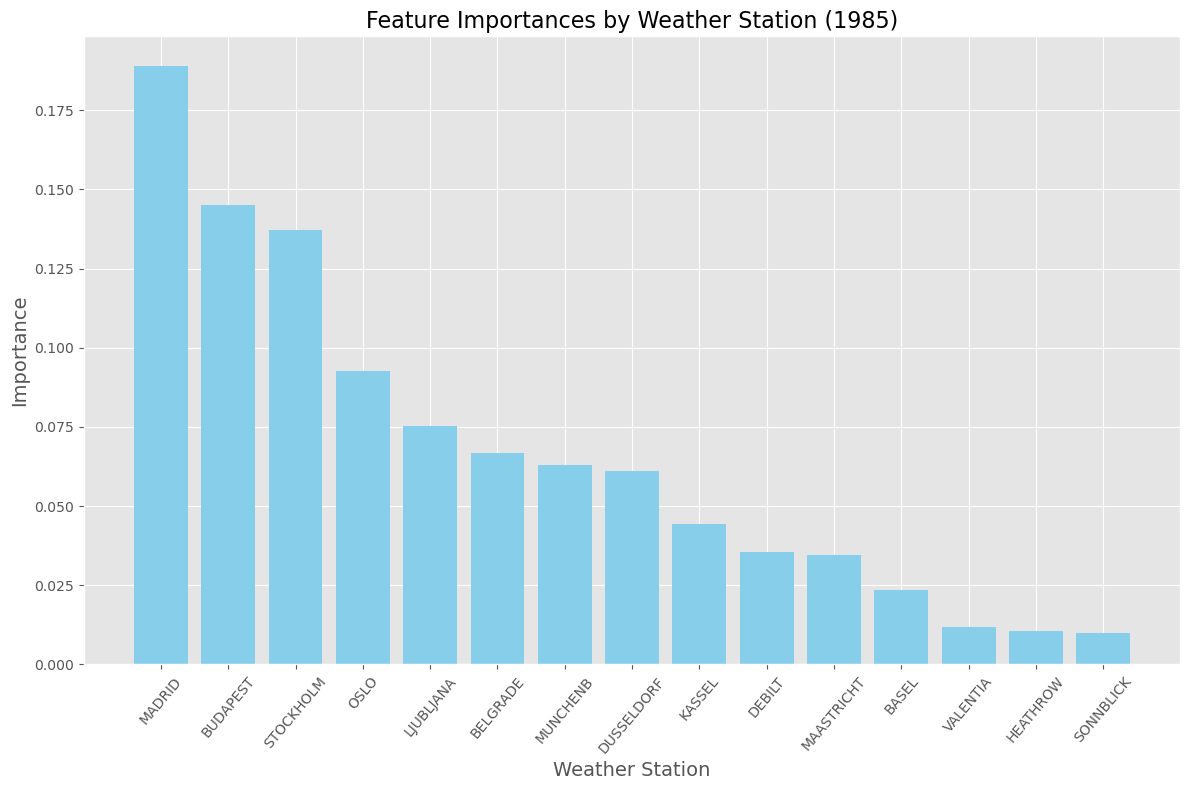

In [96]:
plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_df_1['Weather Station'], collapsed_importances_df_1['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (1985)', fontsize=16)
plt.tight_layout()
plt.show()

# Plotting the Key Indicators for Budapest 

In [99]:
df_pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
df_weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [103]:
df_bud_pleasant = df_pleasant[df_pleasant.columns[df_pleasant.columns.astype(str).str.startswith('BUDAPEST')]]
df_bud_pleasant

,BUDAPEST_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [105]:
df_bud_weather = df_weather[df_weather.columns[df_weather.columns.astype(str).str.startswith('BUDAPEST')]]
df_bud_weather

,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max
0,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1
1,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1
2,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3
3,4,0.67,1.017,0.19,0.00,0.0,2.0,0.4,4.4
4,4,0.67,1.017,0.19,0.00,0.0,2.5,1.1,5.3
...,...,...,...,...,...,...,...,...,...
22945,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22946,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22947,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2
22948,4,0.67,1.017,1.41,0.14,5.4,11.7,7.9,16.2


In [107]:
print(df_bud_weather.shape)
print(df_bud_pleasant.shape)

(22950, 9)
(22950, 1)


In [109]:
# Create matrices
y_4 = df_bud_pleasant.max(axis=1)

print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [111]:
print("Unique values in y_4_combined:", y_4.unique())

Unique values in y_4_combined: [0 1]


In [113]:
X_4 = df_bud_weather.to_numpy()

print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [115]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [117]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=3)  
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=3)

In [118]:
y_pred_4 = clf_4.predict(X_test_4)
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  0.9968630184733357


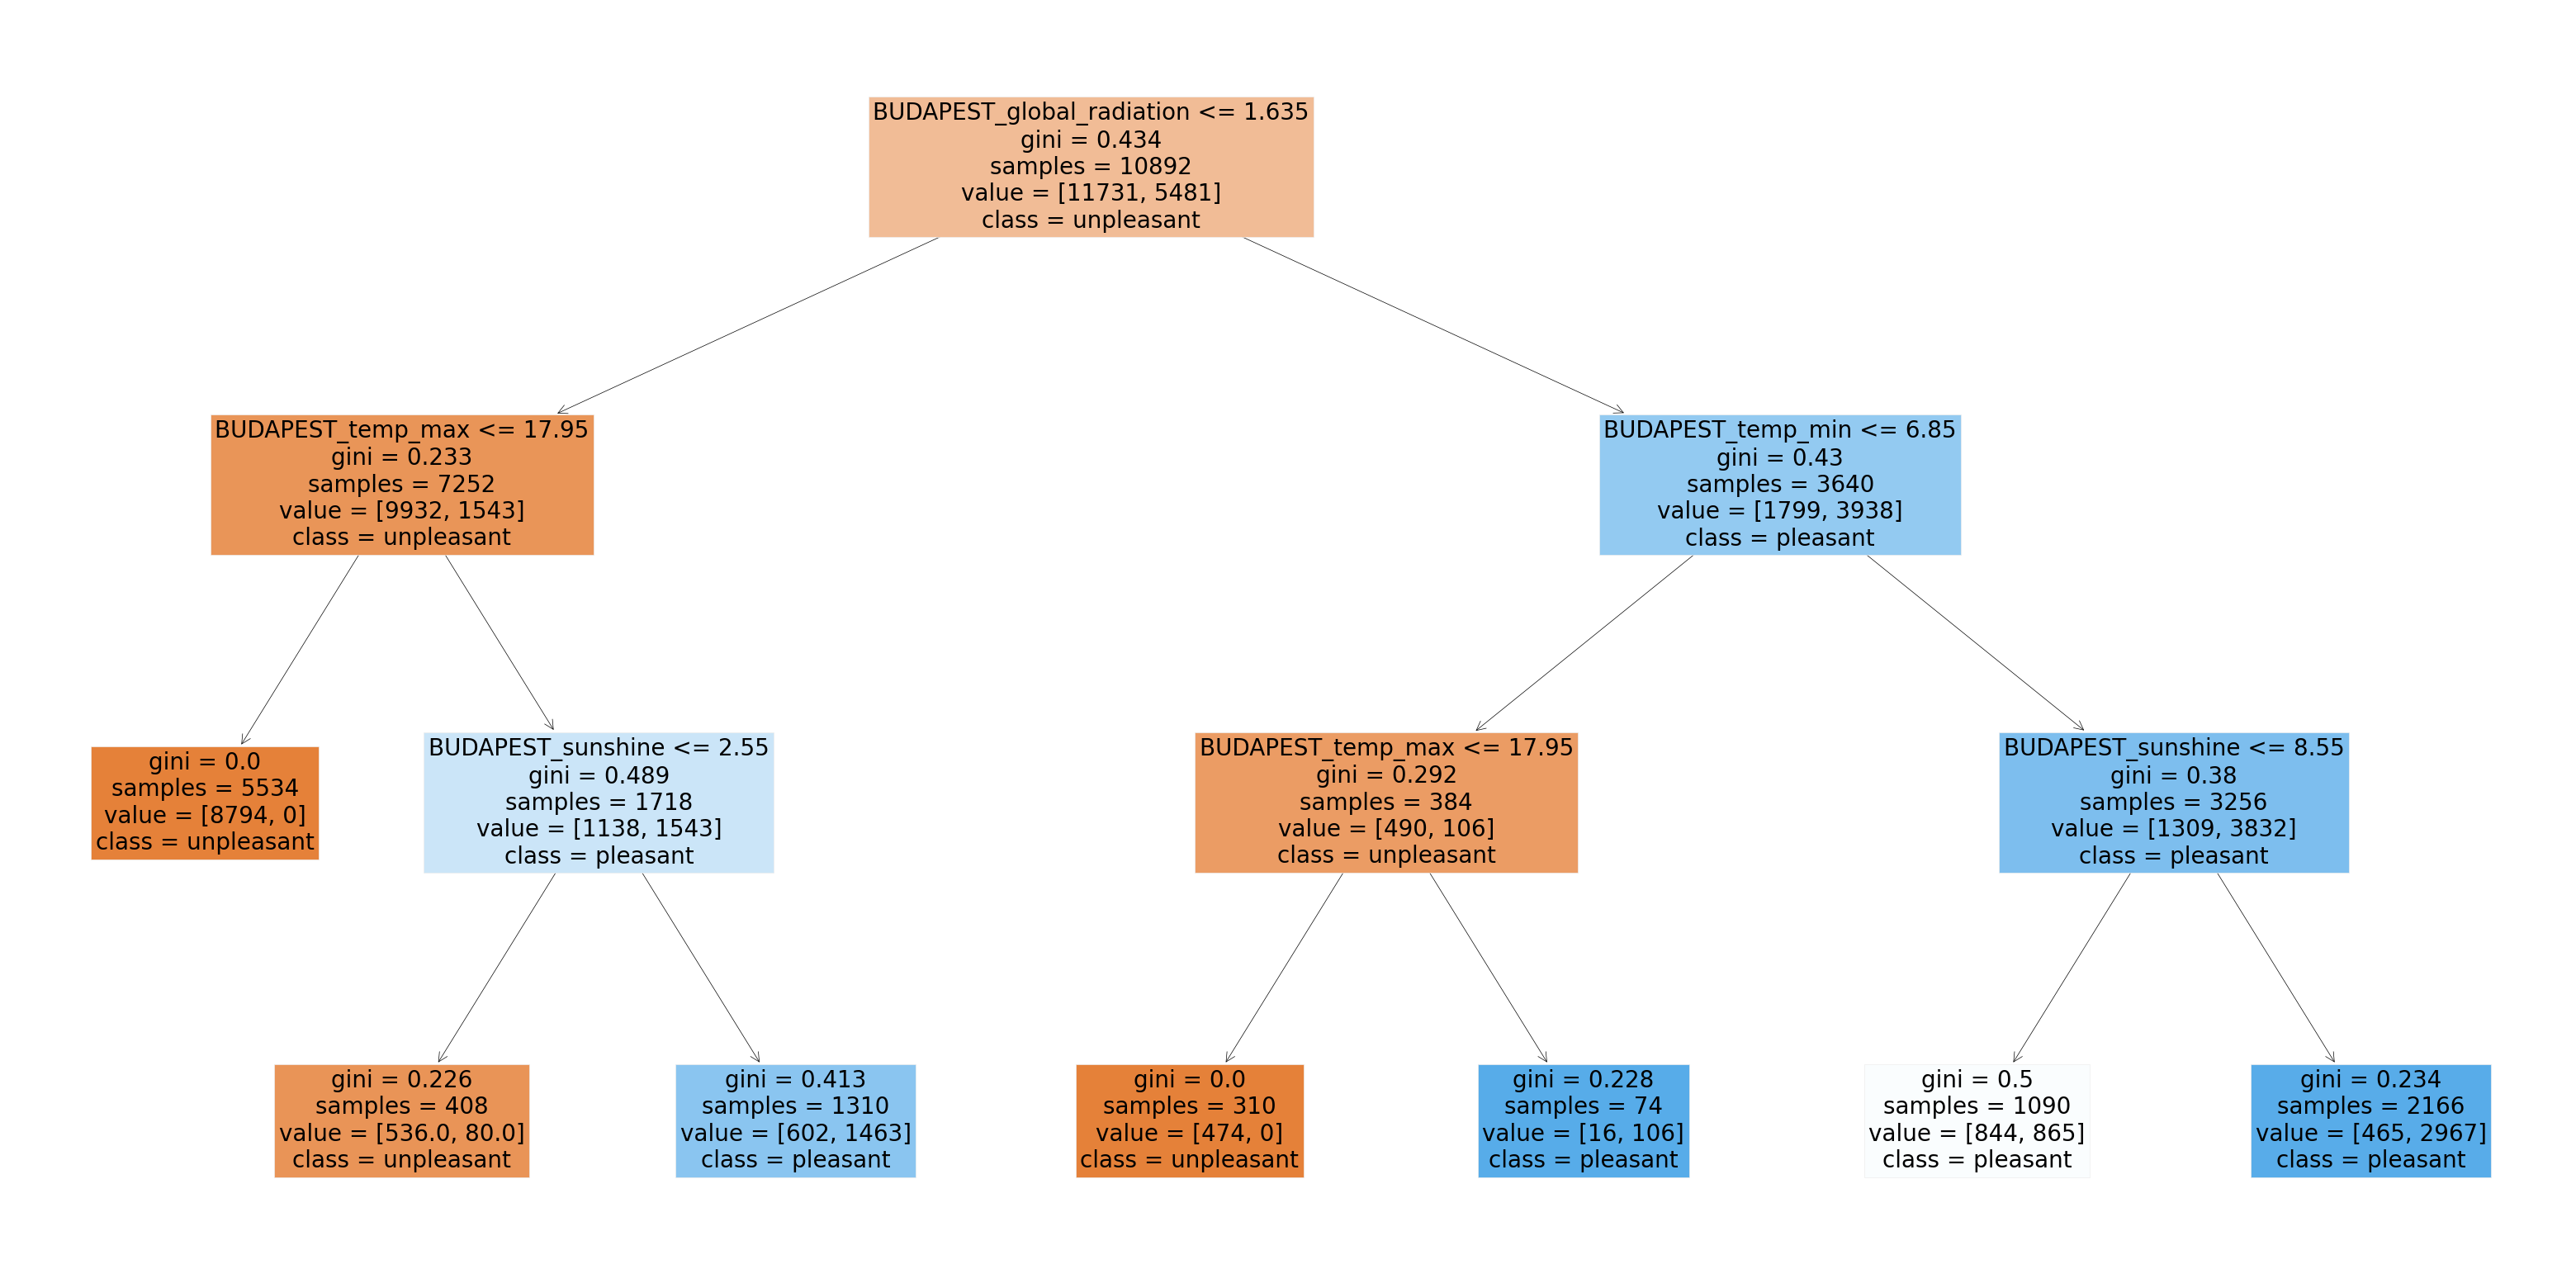

In [119]:
# Plot random forest (Budapest)
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_bud_weather.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [123]:
rf_4.savefig(os.path.join(path, 'Project ClimateWins - Task 2','Visualizations','random_forest_3.png'))

In [125]:
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.01181574 0.00698506 0.00132829 0.07223534 0.22080077 0.07919623
 0.25201358 0.12029961 0.23532537]
(9,)


In [127]:
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [129]:
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [131]:
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
6         temp_mean    0.252014
8          temp_max    0.235325
4     precipitation    0.220801
7          temp_min    0.120300
5          sunshine    0.079196
3  global_radiation    0.072235
0       cloud_cover    0.011816
1          humidity    0.006985
2          pressure    0.001328


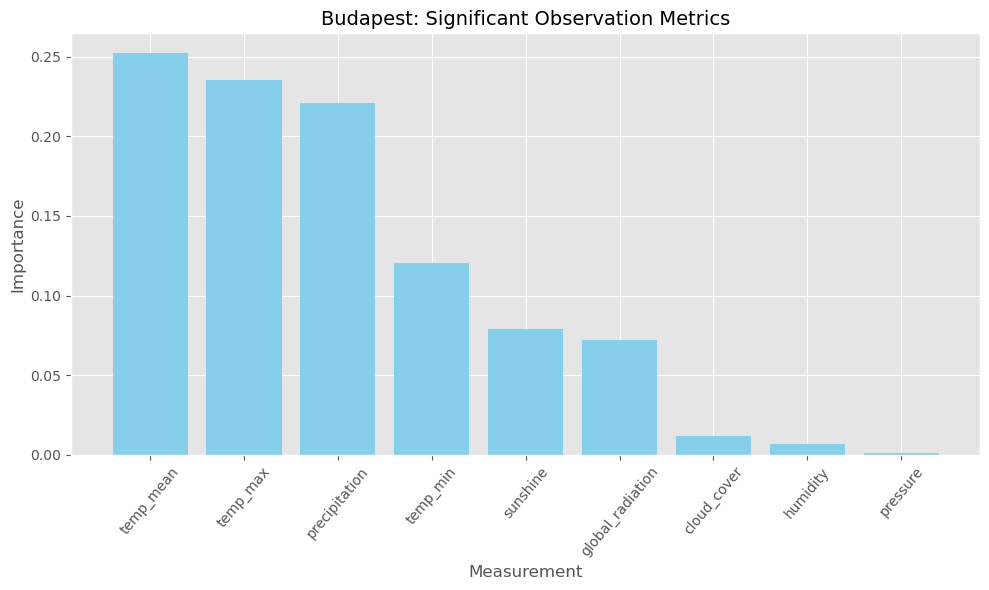

In [133]:
plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_4['Measurement'], importances_df_4['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()